In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##### import data

In [2]:
# the dataset is a simulation of real time ads data
# it shows which ad each person would click (1) or not click (0)
df = pd.read_csv('../data/Ads_CTR_Optimisation.csv')

In [3]:
df

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


##### Upper Confidence Bound (UCB) algorithm

> the goal is to maximize the cumulative reward while also finding the best ad in as few rounds as possible

<img src="../data/images/ucb_algorithm.png" width="400">

In [4]:
import math

N = 10000 # no. of rounds
D = 10 # ads

ads_selected = []
sum_of_rewards = [0] * D
num_of_selections = [0] * D

for n in range(0, N):
    ad = 0
    max_ucb = 0

    # select the ad with highest ucb
    for d in range(0, D):
        if (num_of_selections[d] == 0):
            ucb = 1e400

        else:
            avg_reward = sum_of_rewards[d] / num_of_selections[d]
            delta_i =math.sqrt(3/2 * math.log(n + 1) / num_of_selections[d]) # add 1 to avoid 0 or 1 inside the log
            ucb = avg_reward + delta_i

        if (ucb > max_ucb):
            max_ucb = ucb
            ad = d

    ads_selected.append(ad)
    reward = df.values[n, ad]

    num_of_selections[ad] += 1
    sum_of_rewards[ad] += reward

In [5]:
print('total reward:', sum(sum_of_rewards))

total reward: 2178


##### visualize the results

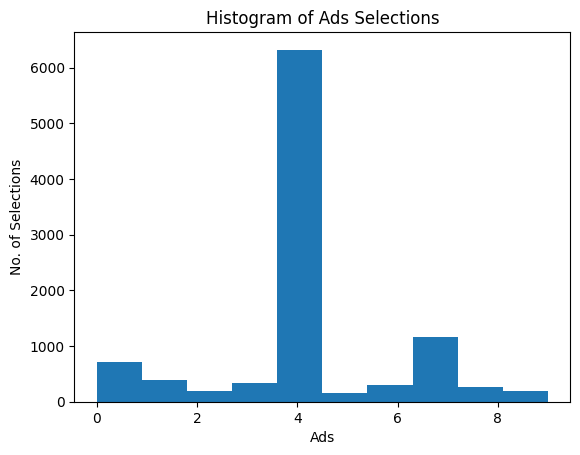

In [6]:
plt.hist(ads_selected)

plt.title('Histogram of Ads Selections')
plt.xlabel('Ads')
plt.ylabel('No. of Selections')
plt.show()

> N = 500 is the min rounds needed by the ucb to show the right ad (checked using hit and run)